In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


: 

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier



from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_auc_score, roc_curve


In [4]:
dfh = pd.read_csv(r'BackEnd\heart\input\train\heart.csv')
dfh.shape

(1025, 14)

In [5]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
dfh.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
dfh.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dfh['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [10]:
def column_format_validation(dfk):
    
    numeric_column  = [col for col in dfk.columns if dfk[col].dtype != 'object']
    category_column = [col for col in dfk.columns if dfk[col].dtype == 'object']
    
    print('Out of {total_col} columns {num_col} \
    columns are numeric and {cat_col} columns are Object'.format(\
                                                                 total_col=dfk.shape[1],\
                                                                 num_col =len(numeric_column),\
                                                                 cat_col =len(category_column)))
    print('List of numeric columns ')
    print('-'*30)
    for col in numeric_column:
          print(col)
    print('-'*30)

    
    print('Numeric df \n',dfk[numeric_column].head())
    
    print('List of Category columns ')
    print('-'*30)

    for col in category_column:
          print(col)
    print('-'*30)

    print('Category df \n:',dfk[category_column].head())
    
    return numeric_column, category_column


In [13]:
print('There are {col} columns and {row} rows present in the heart data set'.format(col=dfh.shape[1],row=dfh.shape[0]))


There are 14 columns and 1025 rows present in the heart data set


In [14]:
numeric_column, category_column = column_format_validation(dfh)

Out of 14 columns 14     columns are numeric and 0 columns are Object
List of numeric columns 
------------------------------
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target
------------------------------
Numeric df 
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
List of Category columns 
------------------------------
------------------------------
Category df 
: Empty DataFrame
Columns: []


In [79]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [80]:
dfh.cp.unique()

array([0, 1, 2, 3], dtype=int64)

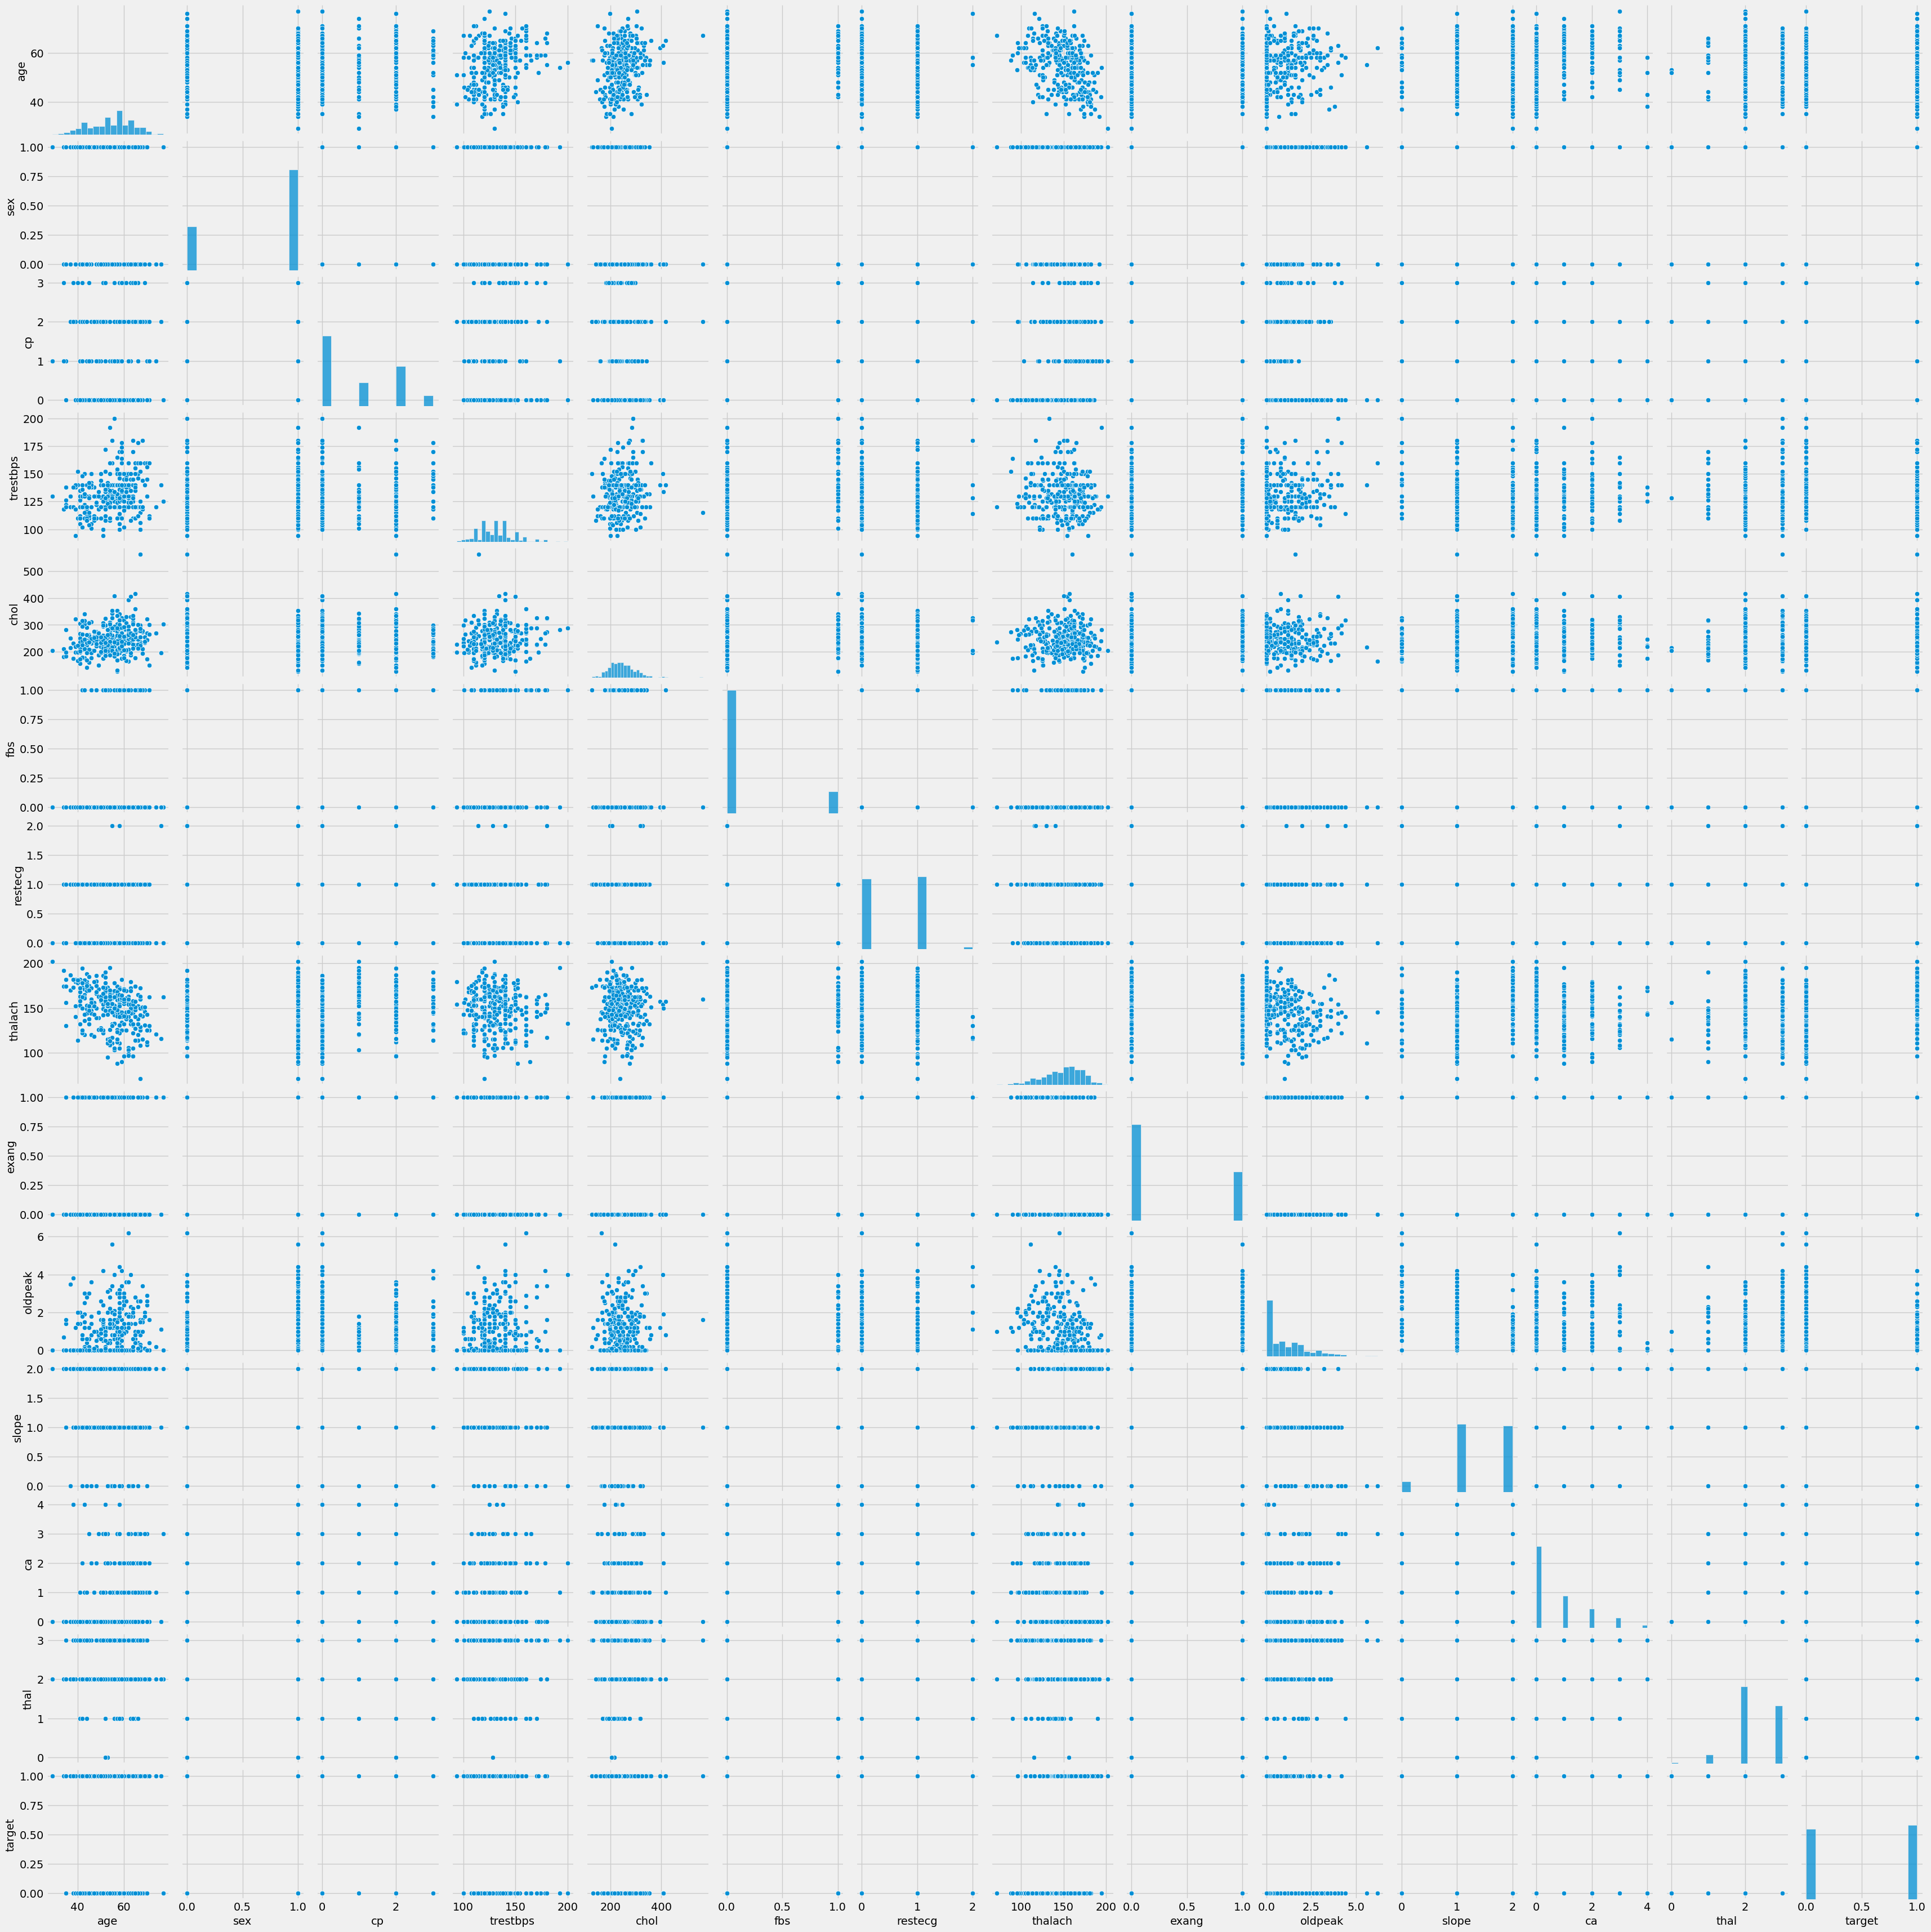

In [6]:
sns.pairplot(dfh)

#### Data Pre Processing

In [16]:
# checking for null values

dfh.isna().sum().sort_values(ascending = False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
dfh[numeric_column].isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
dfh[category_column].isnull().sum()

Series([], dtype: float64)

###### All the missing values are handeled now, lets do ctaegorical features encding now


#### Feature Encoding

In [21]:
X = dfh.drop(columns='target', axis=1)
y = dfh['target']



# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)
# X

#### Model Building

In [32]:
# ind_col = [col for col in dfk.columns if col != 'class']
# dep_col = 'class'

# X = dfk[ind_col]
# y = dfk[dep_col]

In [22]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [68]:
def metrics(X_train,y_train,X_test,y_true,model,model_name,compare_df):
    # accuracy score, confusion matrix and classification report of knn
    y_pred         = model.predict(X_test)
    test_accuracy  = accuracy_score(y_true,  y_pred).round(4)*100
    train_accuracy = accuracy_score(y_train, model.predict(X_train)).round(4)*100
    
    roc_auc        = roc_auc_score(y_true,y_pred).round(3)

    cm    = confusion_matrix( y_true, y_pred )
    df_cm = pd.DataFrame(cm,index=['Actual No','Actual Yes'],columns=['Predicted No','Predicted Yes'])
    
    
    class_report = classification_report( y_test, y_pred, output_dict = True )
    precision    = class_report['weighted avg']['precision']
    recall       = class_report['weighted avg']['recall']
    f1_score     = class_report['weighted avg']['f1-score']
    accuracy     = class_report['accuracy']
    
    if len(compare_df) == 0 :
        compare_df = pd.DataFrame(columns = ['Accuracy','Train Accuracy','Test Accuracy','Precision','Recall','f1-score','roc_auc_score'])
    
    compare_df.loc[model_name] = [accuracy,train_accuracy,test_accuracy,precision,recall,f1_score,roc_auc]
    print(f"Train Accuracy of {model_name} is {train_accuracy}")
    print(f"Test Accuracy of {model_name} is {test_accuracy} \n")

    print('-'*30)
#     df_cm
    print(f"Confusion Matrix :- \n{df_cm}\n")
    print('-'*30)
    print(f"Classification Report :- \n {classification_report( y_true, y_pred )}")
    print('-'*30)
    print(f'roc_auc_score is {roc_auc}')
    fpr, tpr, thresholds = roc_curve(y_true, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name}(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC')
    plt.show()
    
    return compare_df

Train Accuracy of Logistic Regression is 84.66
Test Accuracy of Logistic Regression is 87.01 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No            118             27
Actual Yes            13            150

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      0.81      0.86       145
           1       0.85      0.92      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308

------------------------------
roc_auc_score is 0.867


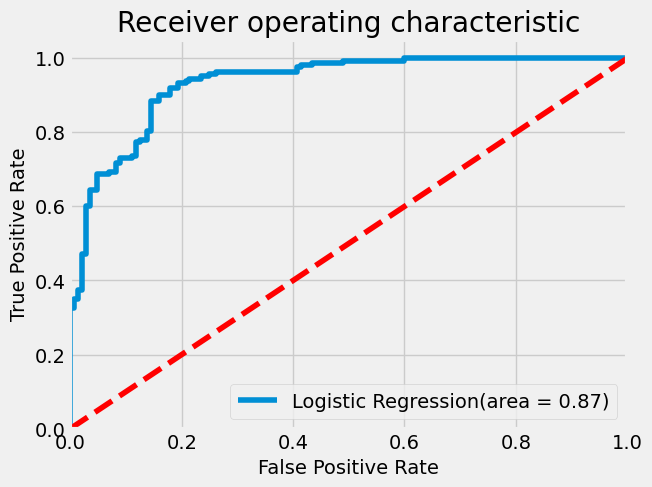

In [71]:
from sklearn.linear_model import LogisticRegression

model_name = 'Logistic Regression'

LogisticReg = LogisticRegression()
LogisticReg.fit(X_train, y_train)

compare_df = pd.DataFrame()
compare_df = metrics(X_train,y_train,X_test,y_test,LogisticReg,model_name,compare_df)

Train Accuracy of Naive Bayes is 81.58999999999999
Test Accuracy of Naive Bayes is 84.42 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No            118             27
Actual Yes            21            142

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       145
           1       0.84      0.87      0.86       163

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308

------------------------------
roc_auc_score is 0.842


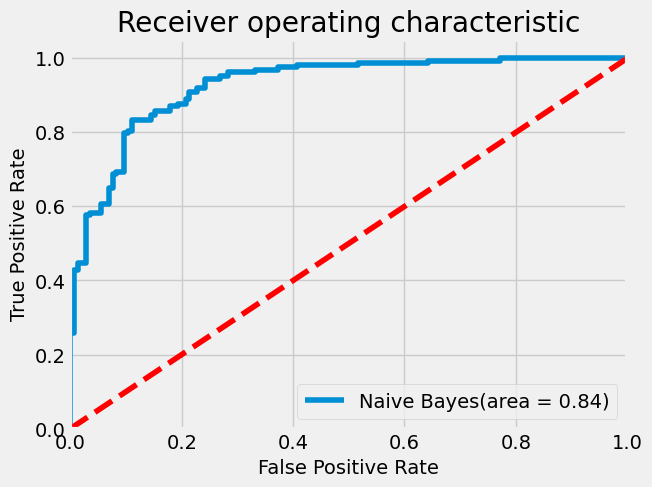

In [73]:
model_name = 'Naive Bayes'

NB = GaussianNB()
NB.fit(X_train,y_train)

compare_df = metrics(X_train,y_train,X_test,y_test,NB,model_name,compare_df)

Train Accuracy of SVC -linear is 83.12
Test Accuracy of SVC -linear is 85.39 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No            112             33
Actual Yes            12            151

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       145
           1       0.82      0.93      0.87       163

    accuracy                           0.85       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308

------------------------------
roc_auc_score is 0.849


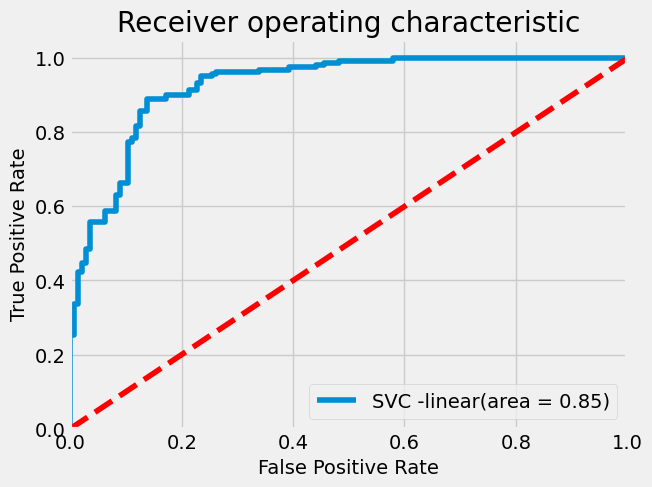

Train Accuracy of SVC -poly is 69.17999999999999
Test Accuracy of SVC -poly is 73.38 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No            106             39
Actual Yes            43            120

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       145
           1       0.75      0.74      0.75       163

    accuracy                           0.73       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.73      0.73      0.73       308

------------------------------
roc_auc_score is 0.734


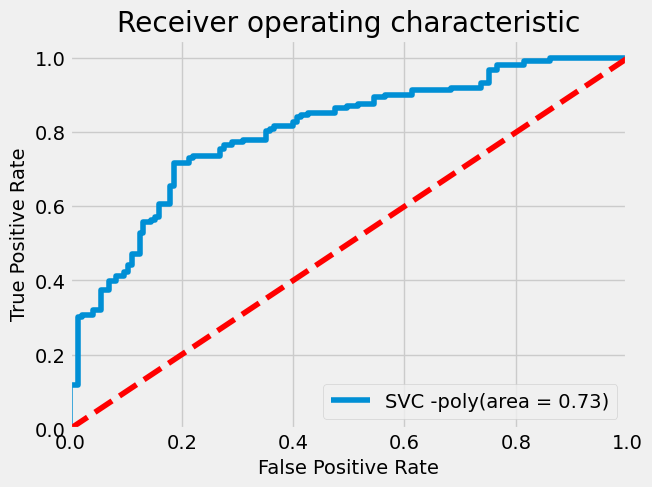

Train Accuracy of SVC -rbf is 69.17999999999999
Test Accuracy of SVC -rbf is 75.0 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No            102             43
Actual Yes            34            129

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.75      0.70      0.73       145
           1       0.75      0.79      0.77       163

    accuracy                           0.75       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.75      0.75      0.75       308

------------------------------
roc_auc_score is 0.747


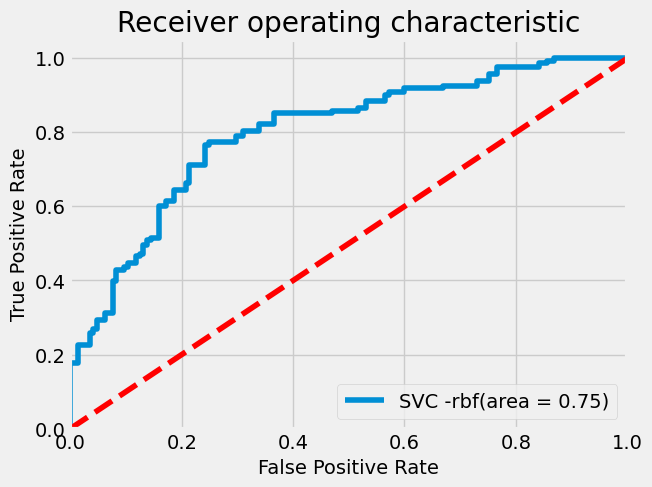

Train Accuracy of SVC -sigmoid is 53.839999999999996
Test Accuracy of SVC -sigmoid is 56.82000000000001 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No             77             68
Actual Yes            65             98

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.54      0.53      0.54       145
           1       0.59      0.60      0.60       163

    accuracy                           0.57       308
   macro avg       0.57      0.57      0.57       308
weighted avg       0.57      0.57      0.57       308

------------------------------
roc_auc_score is 0.566


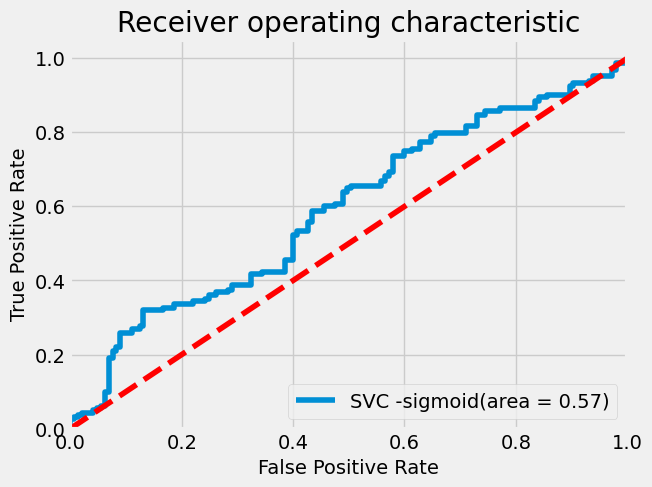

In [74]:
model_name = 'SVC -'
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc = SVC(kernel = kernels[i], probability=True)
    svc.fit(X_train, y_train)
    svc_scores.append(svc.score(X_test, y_test))
    compare_df = metrics(X_train,y_train,X_test,y_test,svc,model_name+kernels[i],compare_df)
# svc = SVC(probability = True)
# svc.fit(X_train,y_train)

#### KNN

Train Accuracy of KNN is 87.72999999999999
Test Accuracy of KNN is 74.35000000000001 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No            114             31
Actual Yes            48            115

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74       145
           1       0.79      0.71      0.74       163

    accuracy                           0.74       308
   macro avg       0.75      0.75      0.74       308
weighted avg       0.75      0.74      0.74       308

------------------------------
roc_auc_score is 0.746


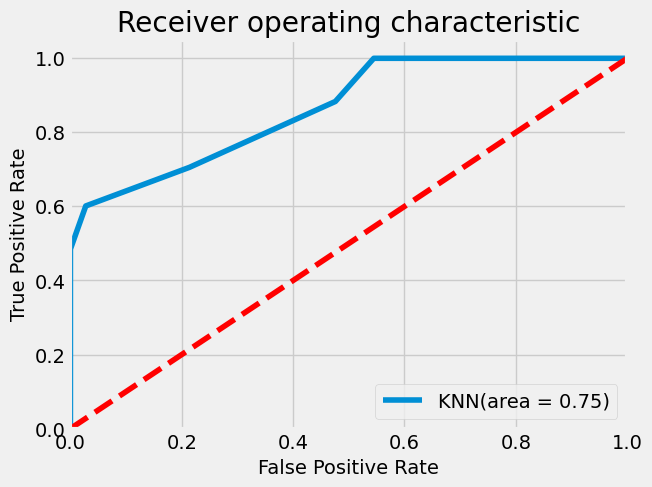

In [75]:
model_name = 'KNN'

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

compare_df = metrics(X_train,y_train,X_test,y_test,knn,model_name,compare_df)

Train Accuracy of Neural Network is 87.45
Test Accuracy of Neural Network is 87.01 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No            110             35
Actual Yes             5            158

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       145
           1       0.82      0.97      0.89       163

    accuracy                           0.87       308
   macro avg       0.89      0.86      0.87       308
weighted avg       0.88      0.87      0.87       308

------------------------------
roc_auc_score is 0.864


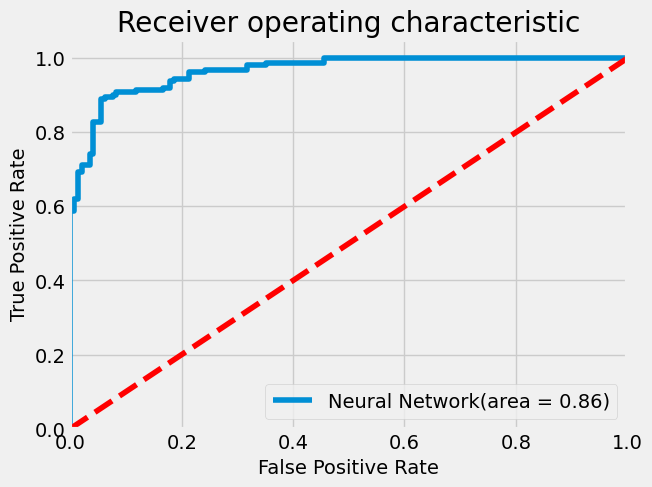

In [76]:
model_name = 'Neural Network'

NN = MLPClassifier(hidden_layer_sizes=(100,80,100),activation='logistic',solver='adam',max_iter=500)
# NN = MLPClassifier()

NN.fit(X_train, y_train)

compare_df = metrics(X_train,y_train,X_test,y_test,NN,model_name,compare_df)


#### Decision Tree Classifier

Train Accuracy of Decision Tree is 100.0
Test Accuracy of Decision Tree is 99.03 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No            145              0
Actual Yes             3            160

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.98      0.99       163

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

------------------------------
roc_auc_score is 0.991


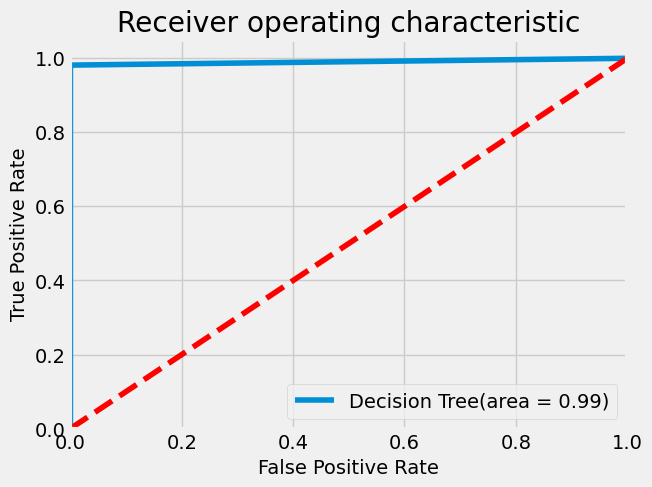

In [77]:
model_name = 'Decision Tree'

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

compare_df = metrics(X_train,y_train,X_test,y_test,dtc,model_name,compare_df)


In [78]:
compare_df

,Accuracy,Train Accuracy,Test Accuracy,Precision,Recall,f1-score,roc_auc_score
Logistic Regression,0.870130,84.66,87.01,0.872553,0.870130,0.869510,0.867
Naive Bayes,0.844156,81.59,84.42,0.844325,0.844156,0.843918,0.842
SVC -linear,0.853896,83.12,85.39,0.859526,0.853896,0.852614,0.849
SVC -poly,0.733766,69.18,73.38,0.734329,0.733766,0.733924,0.734
SVC -rbf,0.750000,69.18,75.00,0.750000,0.750000,0.749355,0.747
SVC -sigmoid,0.568182,53.84,56.82,0.567713,0.568182,0.567894,0.566
KNN,0.743506,87.73,74.35,0.748141,0.743506,0.743552,0.746
Neural Network,0.870130,87.45,87.01,0.883559,0.870130,0.868109,0.864
Decision Tree,0.990260,100.00,99.03,0.990457,0.990260,0.990264,0.991


In [34]:
y_pred = NN.predict(X_test)

In [47]:
class_report = classification_report( y_test, y_pred, output_dict = True )
precision    = class_report['weighted avg']['precision']
recall       = class_report['weighted avg']['recall']
f1-score     = class_report['weighted avg']['f1-score']
accuracy     = class_report['accuracy']

0.8762683945268215

In [44]:
class_report

{'0': {'precision': 0.9076923076923077,
  'recall': 0.8137931034482758,
  'f1-score': 0.858181818181818,
  'support': 145},
 '1': {'precision': 0.848314606741573,
  'recall': 0.9263803680981595,
  'f1-score': 0.8856304985337243,
  'support': 163},
 'accuracy': 0.8733766233766234,
 'macro avg': {'precision': 0.8780034572169404,
  'recall': 0.8700867357732176,
  'f1-score': 0.8719061583577712,
  'support': 308},
 'weighted avg': {'precision': 0.8762683945268215,
  'recall': 0.8733766233766234,
  'f1-score': 0.8727082301862359,
  'support': 308}}

In [42]:
(0.9076923076923077+0.848314606741573)/2

0.8780034572169404

In [36]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [37]:


# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)



{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 1, 'splitter': 'random'}
0.9892857142857142


In [38]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9785714285714285
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[43  5]
 [ 1 71]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.90      0.93        48
           1       0.93      0.99      0.96        72

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120

